### Programación de la red neuronal capaz de detectar ransomware

Para este programa se utilizarán los datos previamente obtenidos y descargados en el módulo “ExtraccionInformacion”, estos ya se les realizo algunas actividades de limpieza y transformación. 

In [1]:
#Importaciones necesarias para la ejecución de la red neuronal. 
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Carga de la información 

Las siguientes líneas de código realizan la carga de la información, guardada previamente del modulo anterior. Y nos muestran su tamaño en este caso 13.748 instancias y 7.528 características. 

In [2]:
filename = 'D:\escritorio\data3.csv'
data = pandas.read_csv(filename, header=0)
print(data.shape)

(13748, 7528)


#### Limpieza de datos adicional 

A pesar que en el modulo anterior se realizo la limpieza y transformación de los datos, en este apartado se realizara la transformación final del dataset para dejar este listo para el entrenamiento de la red neuronal. 

**Nota**: Este paso es muy importante y de aqui depende el exito del entrenamiento y los resultados finales. 

In [3]:
#realicemos la comprobacion de los datos que pueden no tener datos tipo float  
dfColumnas = data.columns
a = 0
for i in dfColumnas: 
    if data[i].dtypes == 'float64':
        a+=1
    else:
        print(i)

Unnamed: 0
Tipo


In [4]:
#Eliminación de la columna Tipo, datos que no se usaran en el entrenamiento. 
data.drop(['Tipo'],axis='columns', inplace=True)

In [5]:
#Eliminación de la columna Unnamed: 0, datos que no se usaran en el entrenamiento. 
data.drop(['Unnamed: 0'],axis='columns', inplace=True)

In [6]:
#Se verifica que se tiene 11.746 muestras de ransomware y 2.002 programas benignos,
#Estos datos fueron obtenidos 
data['ransomware'].value_counts()

1.0    11746
0.0     2002
Name: ransomware, dtype: int64

Para empezar a trabajar únicamente con los valores se realizará la separación de los valores del dataset en las siguientes líneas de código

In [7]:
#separación de la columna objetivo 
y = data["ransomware"]
y = y.values

In [8]:
#Eliminación de la columna ransomware, datos que no usaremos en el entrenamiento. 
data.drop(['ransomware'],axis='columns', inplace=True)

In [9]:
X = data.values

#### Separación del dataset 

Separación del dataset mediante la **función train_test_split**, en donde se destinará un 80% de los datos para el entrenamiento y un 20% para la validación. 
* 10.998 instancias se destinarán a entrenar el modelo
* 2749 instancias se destinarán a evaluar el modelo 


In [10]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [11]:
print('tamaños de la division de los datos: \n')
print("tamaño X_train: ",X_train.shape)
print("tamaño X_validation : ",X_validation.shape)
print("tamaño Y_train : ",Y_train.shape)
print("tamaño Y_validation : ",Y_validation.shape)

tamaños de la division de los datos: 

tamaño X_train:  (10998, 7525)
tamaño X_validation :  (2750, 7525)
tamaño Y_train :  (10998,)
tamaño Y_validation :  (2750,)


In [14]:
#Como tenemos dos tipos de resultados (positivo o negativo) 
#necesitamos dos tipos de variables objetivo 

y_train = to_categorical(Y_train, num_classes=2)
y_test = to_categorical(Y_validation, num_classes=2)
print(y_train.shape) 
print(y_test.shape)

(10998, 2)
(2750, 2)


#### programación del modelo 

La programación del modelo el cual será un modelo básico secuencial según las
especificaciones de la arquitectura propuesta.

Como tecnica de regularización para evitar el overfitting se incluye Dropout con un porcentaje de 20%  


In [13]:
model = Sequential()
model.add(Dense(1028, activation="sigmoid", input_shape=(7525,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1028)              7736728   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1028)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               526848    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 1026      
Total params: 8,264,602
Trainable params: 8,264,602
Non-trainable params: 0
_________________________________________________________________


El total de parámetros que serán entrenados es de **8'264.602**

La arquitectura de la Red fue construida luego de múltiples experimentos de prueba y error donde al final se dejó la que arrojaba mejores resultados. Se inicio con una red relativamente simple y se le fueron añadiendo capas de diferentes tamaños, el resultado final y más optimo fue este.


**Compilación del modelo** 

El modelo se compilo siguiendo las siguientes pautas: 
* Función de perdida = categorical_crossentropy
* Optimizador = sgd
* Metricas = Accuracy 

In [37]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

**Entrenamiento del modelo** 

El modelo se entreno segun las siguientes pautas: 

* Tamaño de batch = 128
* Epochs = 1000

In [38]:
1. history = model.fit(X_train, y_train, 
2.                     batch_size=128, 
3.                     epochs=1000,
4.                     validation_split=0.20)

Train on 8798 samples, validate on 2200 samples
Epoch 1/1000
8798/8798 [==============================] - 6s 660us/step - loss: 0.3997 - accuracy: 0.8517 - val_loss: 0.3468 - val_accuracy: 0.8600
Epoch 2/1000
8798/8798 [==============================] - 6s 663us/step - loss: 0.3488 - accuracy: 0.8581 - val_loss: 0.3107 - val_accuracy: 0.8609
Epoch 3/1000
8798/8798 [==============================] - 6s 641us/step - loss: 0.3160 - accuracy: 0.8703 - val_loss: 0.2862 - val_accuracy: 0.8841
Epoch 4/1000
8798/8798 [==============================] - 6s 663us/step - loss: 0.2921 - accuracy: 0.8812 - val_loss: 0.2634 - val_accuracy: 0.8850
Epoch 5/1000
8798/8798 [==============================] - 6s 654us/step - loss: 0.2716 - accuracy: 0.8912 - val_loss: 0.2475 - val_accuracy: 0.8914
Epoch 6/1000
8798/8798 [==============================] - 6s 649us/step - loss: 0.2558 - accuracy: 0.8982 - val_loss: 0.2349 - val_accuracy: 0.8982
Epoch 7/1000
8798/8798 [==============================] - 6s 661

#### Análisis del entrenamiento y optimización del modelo

Para realizar en análisis del entrenamiento realizado y determinar el número de epoch optimas se realizaron las siguientes graficas encargadas de brindar las tendencias tanto de los valores de accuracy como de loss o perdida:

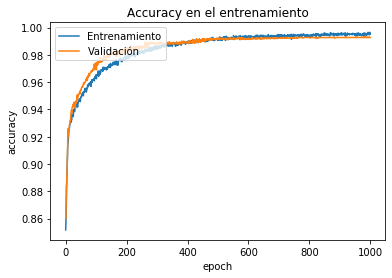

In [55]:
#Grafica del valor de accuracy vs valor de accuracy de los datos de validación
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy en el entrenamiento')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

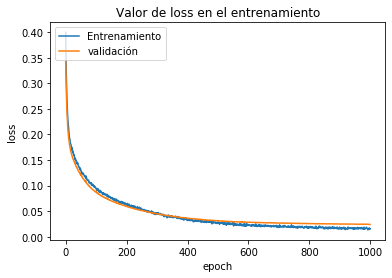

In [57]:
#Grafica del valor de loss tanto de los datos de entrenamiento como de validación
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Valor de loss en el entrenamiento')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'validación'], loc='upper left')
plt.show()

#### Evaluación del Modelo. 

Mediante la función evalúate se realizará la evaluación del modelo con los datos de validación. Esta hace la comparación entre los datos de de validación y las salidas esperadas; datos previamente divididos del dataset. 



In [50]:
test_loss, test_acc = model.evaluate(X_validation, y_test)

2750/2750 [==============================] - 1s 374us/step


El valor de la accuracy del modelo segun los datos de evaluación es de: **99.52%**

In [65]:
print("Datos de evaluación del modelo \n")
print('Valor accuracy:', test_acc)
print('Valor loss:', test_loss)

Datos de evaluación del modelo 

Valor accuracy: 0.9952727556228638
Valor loss: 0.014449851599775932


Si realizamos algunas predicciones con los datos de validación, vemos que el modelo logra identificar plenamente la probabilidad de que sea un valor determinado

In [66]:
#Ejemplo de las predicciones hechas por modelo para el valor "400" 
predictions = model.predict(X_validation)
print(predictions[400])
print(y_train[400])

[0.0010244  0.99897563]
[0. 1.]


**Matrix de Confusión**

Los valores de la matriz de confusión son los siguientes de acuerdo a la comparacion entre los valores de la prediccion y los valores objetivo reales

In [69]:
#valores de la matrix de confusión
matrix = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(matrix)

[[ 405    9]
 [   4 2332]]


En la anterior matrix vemos claramente que tenemos 405 valores verdaderos positivos lo cual  que efectivamente son ransomware, 2332 valores Verdaderos negativos que no son ransomware, 4 valores falsos negativos los cuales fueron identificados erroneamente como no malware por el modelo y 9 valores falsos positivos los cuales fueron identificados erroneamente como ransomware.     